## Data Collection

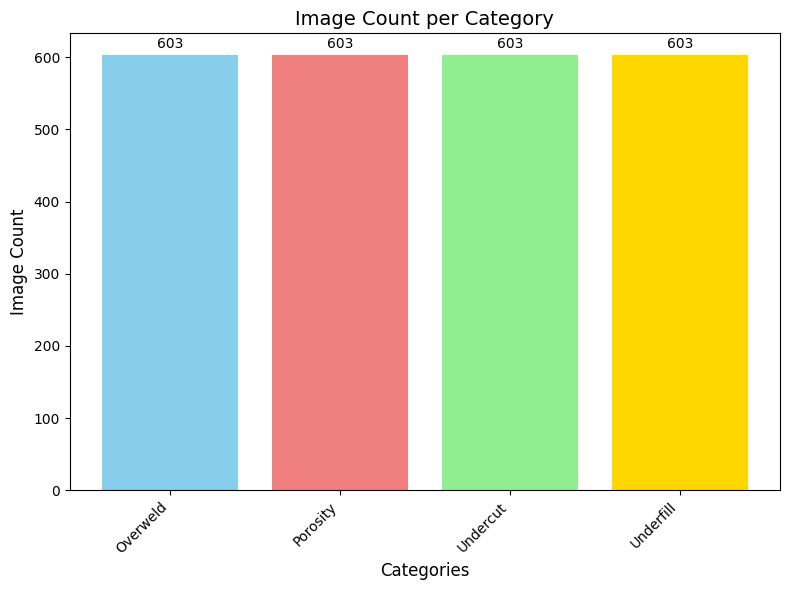

In [2]:


import matplotlib.pyplot as plt

# Data for the bar chart
categories = ['Overweld', 'Porosity', 'Undercut', 'Underfill']
image_counts = [603, 603, 603, 603]

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(categories, image_counts, color=['skyblue', 'lightcoral', 'lightgreen', 'gold'])

# Customize the chart
plt.xlabel("Categories", fontsize=12)
plt.ylabel("Image Count", fontsize=12)
plt.title("Image Count per Category", fontsize=14)
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping

# Add value labels on top of the bars
for i, count in enumerate(image_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

# Display the chart
plt.show()


## Data Analysis

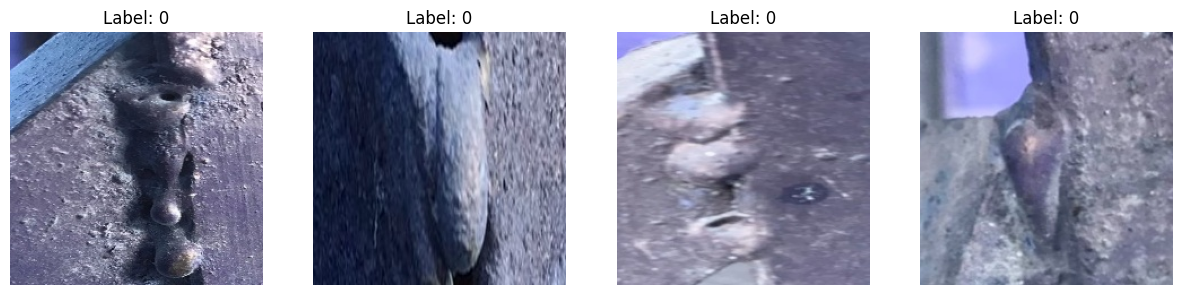

In [ ]:
import matplotlib.pyplot as plt

# Function to display images
def display_images(images, labels, num_images=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i].astype('uint8'))  # Convert to uint8 for display
        plt.title(f"Label: {labels[i]}")
        plt.axis('off')
    plt.show()

# Display sample images from the combined dataset
display_images(combined_images, combined_labels, num_images=4)

## Data Preprocessing

In [26]:
from matplotlib import pyplot as plt
categories = ['Porosity','Overweld', 'Underfilled', 'Undercut']
label_map = {0: 'Porosity', 1: 'Overweld', 2: 'Underfilled', 3: 'Undercut'}

In [ ]:
# Function to extract labels from the pairs
# Function to extract labels from the pairs
def extract_labels(pairs):
    labels = []
    for _, lbl_path in pairs:  # Focus on label paths
        with open(lbl_path, 'r') as file:
            lines = file.readlines()
            # Assuming label in the file is the first value on each line, change as needed
            # Split the line by spaces and take the first element (class ID)
            label = int(lines[0].strip().split()[0])  # Convert to integer
            labels.append(label)
    return np.array(labels)

# Extract labels for train, validation, and test sets
y_train = extract_labels(train_pairs)
y_val = extract_labels(val_pairs)
y_test = extract_labels(test_pairs)

# Print shapes of labels
print(f"Training labels: {y_train.shape}")
print(f"Validation labels: {y_val.shape}")
print(f"Test labels: {y_test.shape}")

In [ ]:
# Normalize images
X_train = X_train.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0


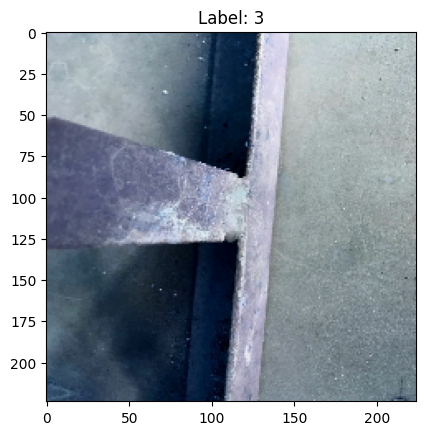

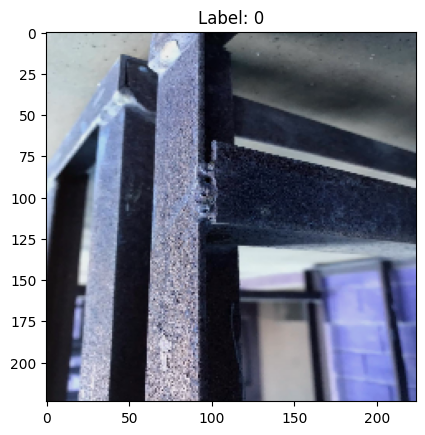

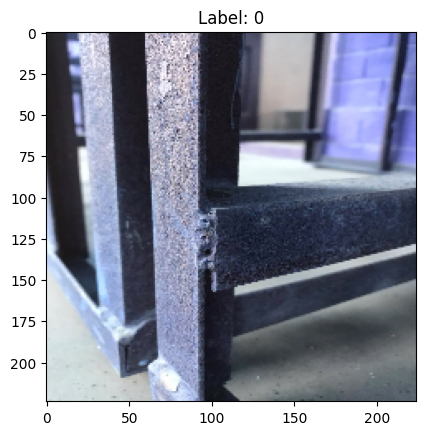

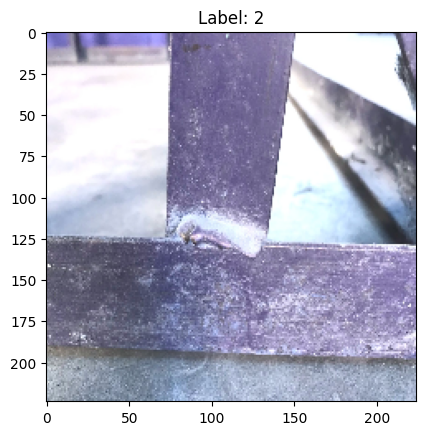

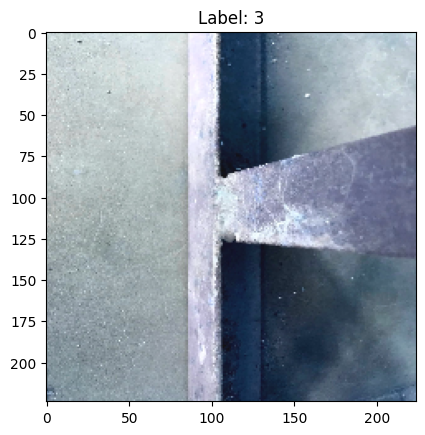

In [ ]:
import matplotlib.pyplot as plt

# Display a few training images
for i in range(5):
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.show()

In [6]:
import os
import glob

# Function to create (image_path, label_path) pairs
def create_pairs(image_folder, label_folder):
    image_paths = sorted(glob.glob(os.path.join(image_folder, "*.jpg")))  # Assuming images are .jpg
    label_paths = sorted([os.path.join(label_folder, os.path.basename(img).replace(".jpg", ".txt")) for img in image_paths])
    return list(zip(image_paths, label_paths))  # Pair images and labels
"""
# Define dataset paths
train_pairs = create_pairs("/content/drive/MyDrive/Defects_welding/yolo/train/images", "/content/drive/MyDrive/Defects_welding/yolo/train/labels")
val_pairs = create_pairs("/content/drive/MyDrive/Defects_welding/yolo/test/images", "/content/drive/MyDrive/Defects_welding/yolo/test/labels")
test_pairs = create_pairs("/content/drive/MyDrive/Defects_welding/yolo/Testdata/images", "/content/drive/MyDrive/Defects_welding/yolo/Testdata/labels")
"""
# Define dataset paths
train_pairs = create_pairs("/kaggle/input/data-welding/train-20250312T172148Z-001/train/images", "/kaggle/input/data-welding/train-20250312T172148Z-001/train/labels")
val_pairs = create_pairs("/kaggle/input/data-welding/test-20250312T172147Z-001/test/images", "/kaggle/input/data-welding/test-20250312T172147Z-001/test/labels")
test_pairs = create_pairs("/kaggle/input/data-welding/Testdata-20250320T164930Z-001/Testdata/images", "/kaggle/input/data-welding/Testdata-20250320T164930Z-001/Testdata/labels")
print(f"Train samples: {len(train_pairs)}, Val samples: {len(val_pairs)}, Test samples: {len(test_pairs)}")


Train samples: 1600, Val samples: 400, Test samples: 400


In [7]:
import cv2
import numpy as np

# Function to load and normalize images
def load_normalized_images(pairs, img_size=(224, 224)):
    images = []
    for img_path, _ in pairs:  # Only focus on image paths
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, img_size)  # Resize to target size
            img = img.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
            images.append(img)
    return np.array(images)

# Load images
X_train = load_normalized_images(train_pairs)
X_val = load_normalized_images(val_pairs)
X_test = load_normalized_images(test_pairs)

print(f"Training images: {X_train.shape}, Validation images: {X_val.shape}, Test images: {X_test.shape}")


Training images: (1600, 224, 224, 3), Validation images: (400, 224, 224, 3), Test images: (400, 224, 224, 3)


In [8]:
# Function to extract labels from YOLO format
def extract_labels(pairs):
    labels = []
    for _, lbl_path in pairs:
        with open(lbl_path, 'r') as file:
            lines = file.readlines()
            if lines:  # Check if file is not empty
                label = int(lines[0].strip().split()[0])  # Extract first class ID
            else:
                label = 0  # Assign default class (if empty)
            labels.append(label)
    return np.array(labels)

# Extract labels
y_train = extract_labels(train_pairs)
y_val = extract_labels(val_pairs)
y_test = extract_labels(test_pairs)

print(f"Training labels: {y_train.shape}, Validation labels: {y_val.shape}, Test labels: {y_test.shape}")


Training labels: (1600,), Validation labels: (400,), Test labels: (400,)


## Model Training

## YOLOv8l + VGG 16

In [9]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

In [10]:
# One-hot encode the labels
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
y_train = to_categorical(y_train, num_classes=4)
y_val = to_categorical(y_val, num_classes=4)
y_test = to_categorical(y_test, num_classes=4)

In [11]:
# Load the VGG16 model without the top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base to use pre-trained features
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [26]:
# Add new layers for your task
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)  # Fully connected layer
x = Dropout(0.5)(x)  # Dropout for regularization
predictions = Dense(4, activation='softmax')(x)  # 4 categories for defects

# Define the complete model
vgg_model = Model(inputs=base_model.input, outputs=predictions)

In [27]:
vgg_model.compile(optimizer= tf.keras.optimizers.Adam(1e-5),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

# Display the model architecture
vgg_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 21,138,500 (80.64 MB)

 Trainable params: 6,423,812 (24.50 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [28]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = vgg_model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=40,
                        batch_size=32,
                        callbacks=[early_stopping])

Epoch 1/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 13s 217ms/step - accuracy: 0.4783 - loss: 1.1861 - val_accuracy: 0.9675 - val_loss: 0.3619
Epoch 2/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 189ms/step - accuracy: 0.9388 - loss: 0.3650 - val_accuracy: 0.9650 - val_loss: 0.1747
Epoch 3/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - accuracy: 0.9545 - loss: 0.2046 - val_accuracy: 0.9700 - val_loss: 0.1261
Epoch 4/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - accuracy: 0.9645 - loss: 0.1566 - val_accuracy: 0.9725 - val_loss: 0.1072
Epoch 5/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 190ms/step - accuracy: 0.9721 - loss: 0.1269 - val_accuracy: 0.9725 - val_loss: 0.0959
Epoch 6/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 184ms/step - accuracy: 0.9741 - loss: 0.1124 - val_accuracy: 0.9725 - val_loss: 0.0905
Epoch 7/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 180ms/step - accuracy: 0.9784 - loss: 0.0925 - val_accuracy: 0.9725 - val_loss: 0.0870
Epoch 8/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 9s 179ms/step - accuracy: 0.9748 - loss: 0.0876 - val_accuracy:

In [29]:
# Save the model after training
vgg_model.save('/kaggle/working/vgg_defect_classifier.h5')

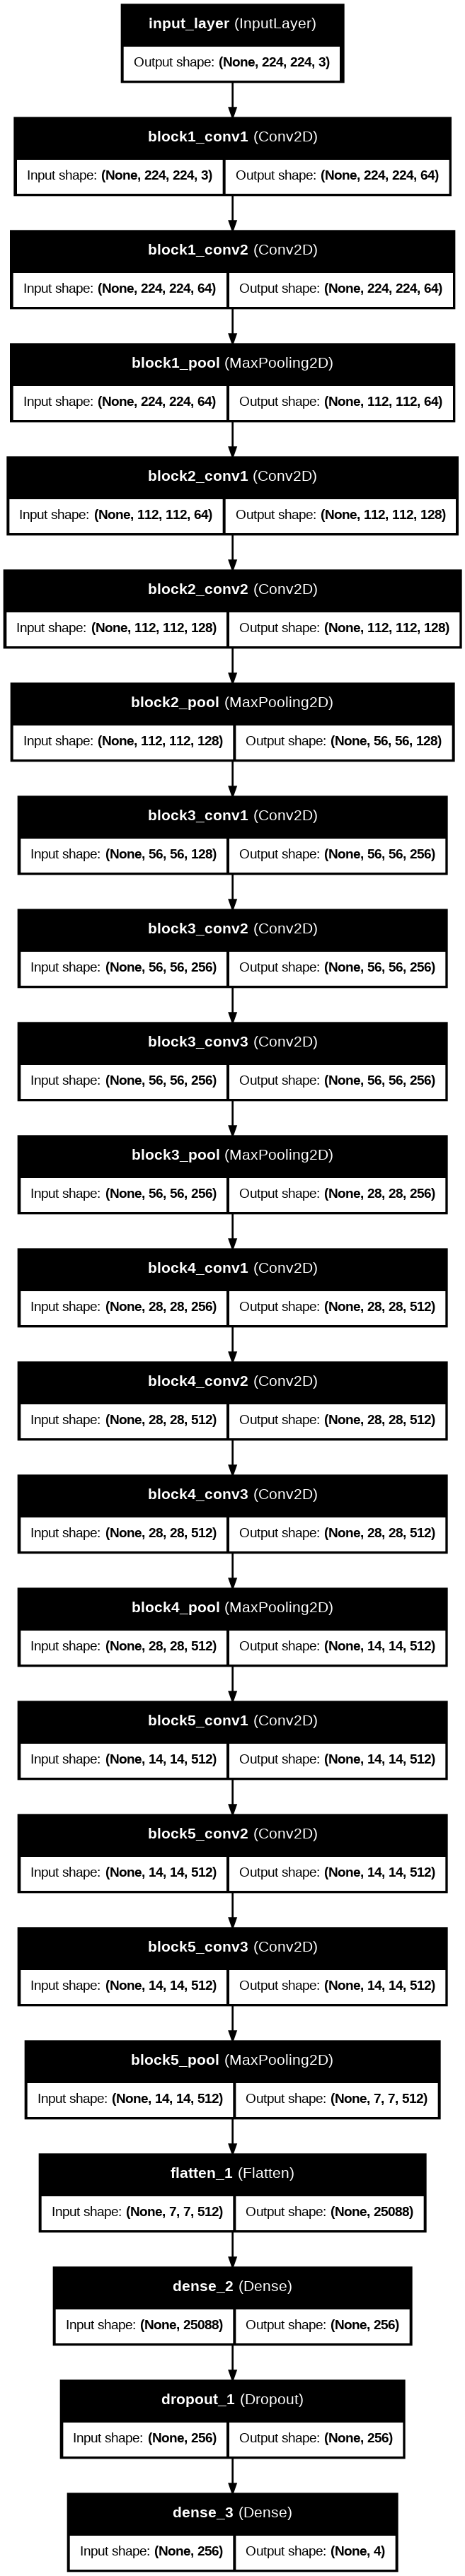

In [30]:
from tensorflow.keras.utils import plot_model
# Generate a plot of the model architecture
plot_model(
    vgg_model,
    to_file='model_architecture.png',  # Save the plot to a file
    show_shapes=True,                  # Display the shape of the layers
    show_layer_names=True,             # Display layer names
    dpi=96                             # Set the resolution of the image
)

### Accuracy

In [39]:
# Evaluate the model on the test set
test_loss, test_acc = vgg_model.evaluate(X_val, y_val)
print(f"Test accuracy: {test_acc}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.9957 - loss: 0.0212
Test accuracy: 0.9750000238418579


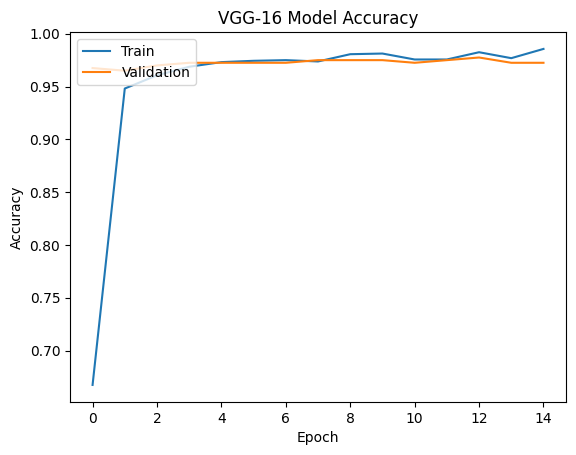

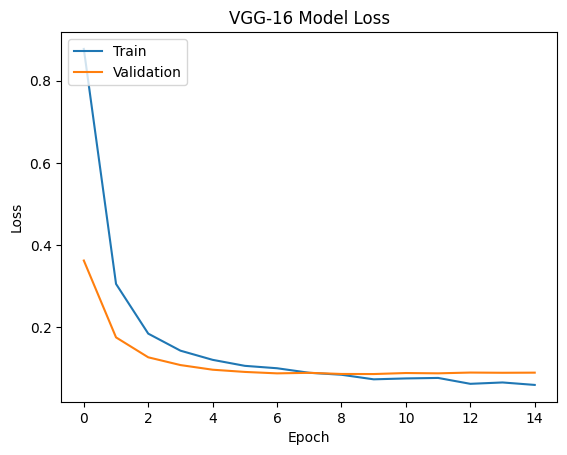

In [32]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('VGG-16 Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('VGG-16 Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [41]:
# Make predictions on the test set
predictions = vgg_model.predict(X_val)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 145ms/step


Confusion Matrix:
[[100   1   2   0]
 [  0  97   1   2]
 [  0   2  83   0]
 [  0   0   2 110]]


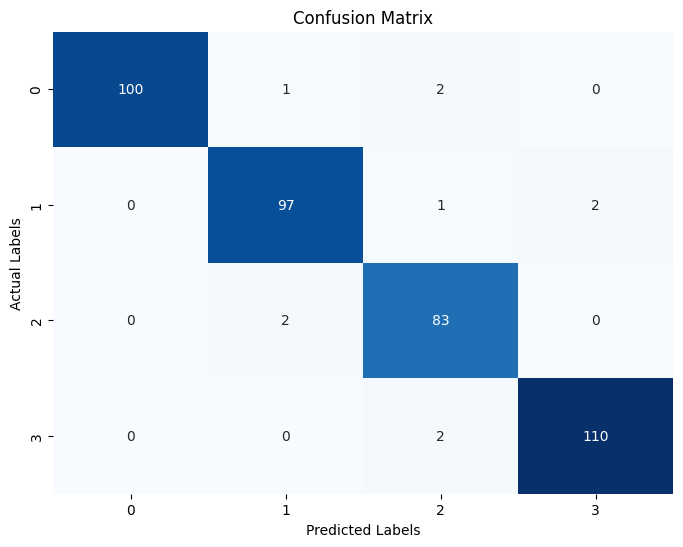

In [42]:
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Convert predictions to class indices (argmax to get the predicted class)
predicted_labels = np.argmax(predictions, axis=1)

# 2. Convert y_test (one-hot encoded) to class indices
y_test_labels = np.argmax(y_val, axis=1)

# 3. Calculate the confusion matrix
confusion_matrix1 = tf.math.confusion_matrix(y_test_labels, predicted_labels)

# 4. Convert to numpy for easier handling
confusion_matrix1 = confusion_matrix1.numpy()

# Print the confusion matrix as a raw tensor
print("Confusion Matrix:")
print(confusion_matrix1)
# Optionally, visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix1, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

In [43]:
from sklearn.metrics import classification_report

# Evaluate the model on the test set
test_loss, test_acc = vgg_model.evaluate(X_val, y_val, verbose=0)
print(f"Test Accuracy: {test_acc:.2f}")

# Predict class labels
y_pred = np.argmax(vgg_model.predict(X_val), axis=1)
y_true = np.argmax(y_val, axis=1)  # Assuming y_test is one-hot encoded

# Classification report
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=categories)  # Replace 'class_names' with your class labels
print("Classification Report:")
print(report)

Test Accuracy: 0.98
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 146ms/step
Classification Report:
              precision    recall  f1-score   support

    Overweld       1.00      0.97      0.99       103
    Undercut       0.97      0.97      0.97       100
 Underfilled       0.94      0.98      0.96        85
    Porosity       0.98      0.98      0.98       112

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.98      0.97      0.98       400



In [44]:

# Predict class labels
y_pred = np.argmax(vgg_model.predict(X_val), axis=1)
y_true = np.argmax(y_val, axis=1)  # Assuming y_test is one-hot encoded

# Calculate precision, recall, and F1-score
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 149ms/step
Precision: 0.98
Recall: 0.97
F1-Score: 0.98


In [42]:
import time
import numpy as np
from tensorflow.keras.models import load_model

# Load the model
vgg_model = load_model("/kaggle/working/vgg_defect_classifier.h5")  


In [44]:
 # Total number of test images
total_time = 0

for i in range(num_images):
    img = np.expand_dims(X_test[i], axis=0)  # Add batch dimension

    start_time = time.time()
    _ = vgg_model.predict(img, verbose=0)  # Run inference
    end_time = time.time()
    total_time += (end_time - start_time)

avg_time_per_image = total_time / 400

print(f"Total Inference Time: {total_time:.6f} seconds")
print(f"Average Inference Time per Image: {avg_time_per_image:.6f} seconds")

Total Inference Time: 25.276258 seconds
Average Inference Time per Image: 0.063191 seconds


### Prediction

In [45]:
import matplotlib.pyplot as plt

# Function to plot the images with their predicted labels
def plot_predictions(images, true_labels, predicted_labels, categories, num_images=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        plt.title(f"True: {categories[np.argmax(true_labels[i])]}, Pred: {categories[predicted_labels[i]]}")
    plt.tight_layout()
    plt.show()

In [49]:

#0: Overweld',1:  'Undercut', 2: 'Underfilled', 3: 'Porosity'#
# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Map predicted labels to category names
predicted_categories = [categories[label] for label in predicted_labels]

# Print the predicted categories
print("Predicted categories:", predicted_categories)

Predicted categories: ['Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Poro

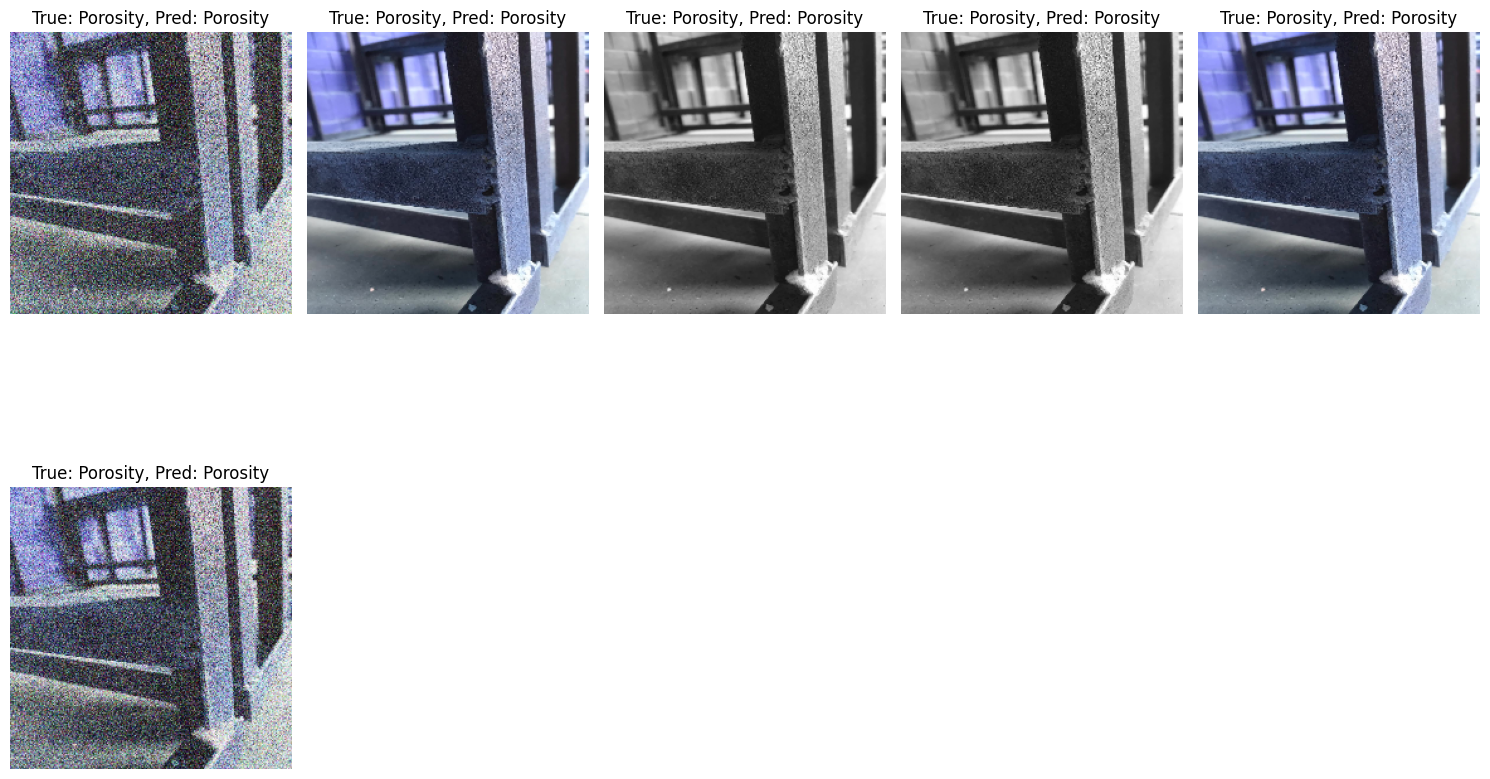

In [50]:
plot_predictions(X_test, y_test, predicted_labels, categories, num_images=6)

## YOLO8n + DenseNet121

In [118]:
from tensorflow.keras.applications import DenseNet121  # You can use DenseNet169, DenseNet201, etc.
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [52]:
# Load the pre-trained DenseNet121 model without the top layer
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers to retain pre-trained features
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for your classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global pooling to reduce dimensions
x = Dense(1024, activation='relu')(x)
x = Dropout(0.7) (x)
predictions = Dense(len(categories), activation='softmax')(x)

29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [119]:
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model

# Load the pre-trained DenseNet121 model without the top layer
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[:100]:  # Unfreeze the last 100 layers
    layer.trainable = False


# Add custom layers for your classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global pooling to reduce dimensions
x = Dense(1024, activation='relu')(x)
x = BatchNormalization()(x)  # Batch Normalization
x = Dropout(0.5)(x)  # Reduced dropout rate
predictions = Dense(len(categories), activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
densenet_model= model

In [120]:
# Compile the model
densenet_model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = densenet_model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=40,
                        batch_size=32,
                        callbacks=[early_stopping])


Epoch 1/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 109s 438ms/step - accuracy: 0.8278 - loss: 0.5246 - val_accuracy: 0.9700 - val_loss: 0.1956
Epoch 2/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 216ms/step - accuracy: 0.9817 - loss: 0.0876 - val_accuracy: 0.9725 - val_loss: 0.1213
Epoch 3/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 215ms/step - accuracy: 0.9803 - loss: 0.0818 - val_accuracy: 0.9700 - val_loss: 0.1195
Epoch 4/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 208ms/step - accuracy: 0.9787 - loss: 0.0661 - val_accuracy: 0.9675 - val_loss: 0.1207
Epoch 5/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - accuracy: 0.9884 - loss: 0.0541 - val_accuracy: 0.9650 - val_loss: 0.1557
Epoch 6/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 204ms/step - accuracy: 0.9886 - loss: 0.0458 - val_accuracy: 0.9625 - val_loss: 0.1735
Epoch 7/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step - accuracy: 0.9860 - loss: 0.0533 - val_accuracy: 0.9575 - val_loss: 0.2096
Epoch 8/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 206ms/step - accuracy: 0.9861 - loss: 0.0481 - val_acc

In [121]:
# Evaluate on the test set
test_loss, test_acc = densenet_model.evaluate(X_test, y_test)
print(f"Test accuracy after fine-tuning: {test_acc}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.9380 - loss: 0.1940
Test accuracy after fine-tuning: 0.9424999952316284


In [122]:
# Evaluate on the validation set
test_loss, test_acc = densenet_model.evaluate(X_val, y_val)
print(f"Test accuracy after fine-tuning: {test_acc}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.9946 - loss: 0.0257
Test accuracy after fine-tuning: 0.9700000286102295


In [123]:
# Display model summary
densenet_model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_17            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_6          │ (None, 230, 230, 3)    │              0 │ input_layer_17[0][0]   │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d_6[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_7          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_7[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 22,505,166 (85.85 MB)

 Trainable params: 7,204,932 (27.48 MB)

 Non-trainable params: 890,368 (3.40 MB)

 Optimizer params: 14,409,866 (54.97 MB)

### Accuracy

In [124]:
# Save the model after training
densenet_model.save('/kaggle/working/densenet_defect_classifier.h5')

In [45]:
import time
import numpy as np
from tensorflow.keras.models import load_model

# Load the model
densenet_model = load_model("/kaggle/working/densenet_defect_classifier.h5")  


In [46]:
# Total number of test images
total_time = 0

for i in range(num_images):
    img = np.expand_dims(X_test[i], axis=0)  # Add batch dimension

    start_time = time.time()
    _ = densenet_model.predict(img, verbose=0)  # Run inference
    end_time = time.time()

    total_time += (end_time - start_time)

avg_time_per_image = total_time / 400

print(f"Total Inference Time: {total_time:.6f} seconds")
print(f"Average Inference Time per Image: {avg_time_per_image:.6f} seconds")

Total Inference Time: 32.816378 seconds
Average Inference Time per Image: 0.082041 seconds


In [125]:
# Make predictions on the test set
predictions = densenet_model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 14s 600ms/step


Confusion Matrix:
[[ 99   0   0   1]
 [  0  78   1  21]
 [  0   0 100   0]
 [  0   0   0 100]]


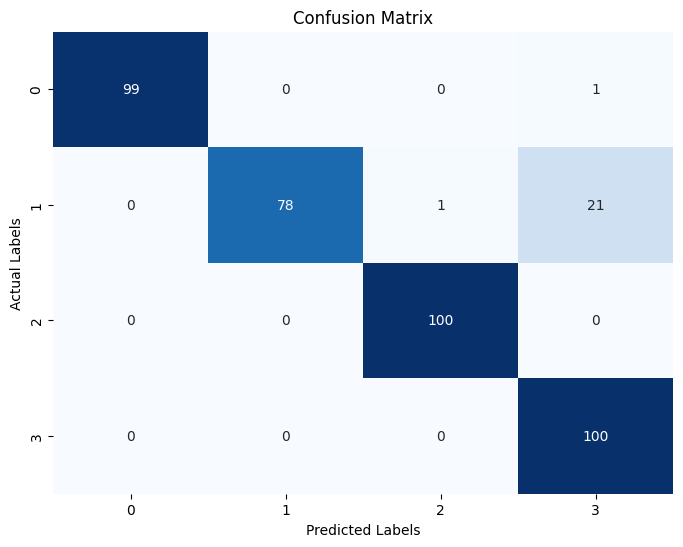

In [126]:
# 1. Convert predictions to class indices (argmax to get the predicted class)
import seaborn as sns
predicted_labels = np.argmax(predictions, axis=1)

# 2. Convert y_test (one-hot encoded) to class indices
y_test_labels = np.argmax(y_test, axis=1)

# 3. Calculate the confusion matrix
confusion_matrix2 = tf.math.confusion_matrix(y_test_labels, predicted_labels)

# 4. Convert to numpy for easier handling
confusion_matrix2= confusion_matrix2.numpy()

# Print the confusion matrix as a raw tensor
print("Confusion Matrix:")
print(confusion_matrix2)
# Optionally, visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix2, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

In [127]:
# Predict class labels
y_pred = np.argmax(densenet_model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)  # Assuming y_test is one-hot encoded

# Classification report
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=categories)  # Replace 'class_names' with your class labels
print("Classification Report:")
print(report)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step
Classification Report:
              precision    recall  f1-score   support

    Porosity       1.00      0.99      0.99       100
    Overweld       1.00      0.78      0.88       100
 Underfilled       0.99      1.00      1.00       100
    Undercut       0.82      1.00      0.90       100

    accuracy                           0.94       400
   macro avg       0.95      0.94      0.94       400
weighted avg       0.95      0.94      0.94       400



In [128]:


# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Map predicted labels to category names
predicted_categories = [categories[label] for label in predicted_labels]

# Print the predicted categories
print("Predicted categories:", predicted_categories)

Predicted categories: ['Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Undercut', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Poro

### Predictions

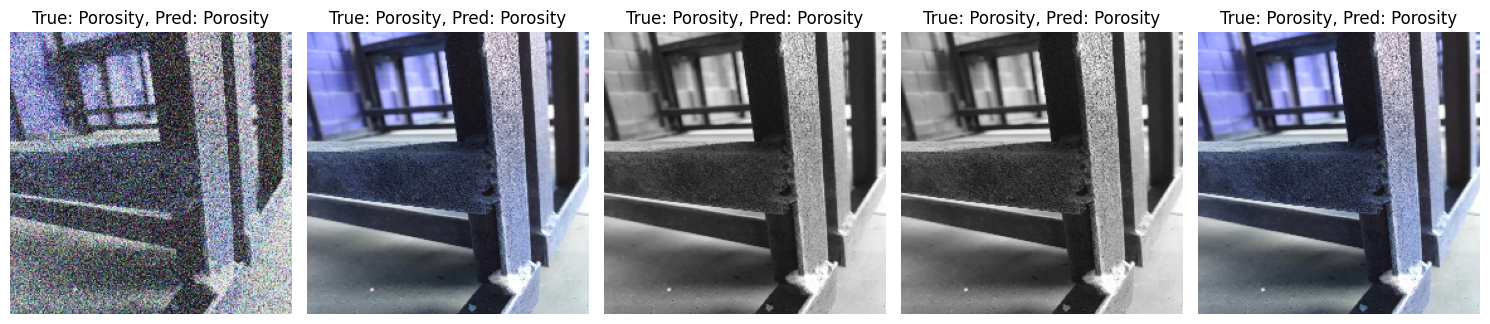

In [129]:
plot_predictions(X_test, y_test, predicted_labels, categories, num_images=5)

## YOLOv8m + ResNet50

In [32]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

# Load ResNet50 without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze last few layers for fine-tuning

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[:100]:  # Unfreeze the last 100 layers
    layer.trainable = False


x = layers.GlobalAveragePooling2D()(base_model.output)  # Flatten the feature map
x = layers.Dense(1024, activation='relu')(x)  # Add a fully connected layer
x = layers.Dropout(0.5)(x)  # Add dropout for regularization
output_layer = layers.Dense(4, activation='softmax')(x)  # Final output layer for 10 classes
# Adjust for 4 classes

# Create final model
model_resnet = Model(inputs=base_model.input, outputs=output_layer)

# Compile model
model_resnet.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [33]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model_resnet.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=40,
                        batch_size=32,
                        callbacks=[early_stopping])

Epoch 1/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 52s 384ms/step - accuracy: 0.7852 - loss: 0.5702 - val_accuracy: 0.2125 - val_loss: 1.5608
Epoch 2/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 212ms/step - accuracy: 0.9555 - loss: 0.1442 - val_accuracy: 0.3575 - val_loss: 1.3160
Epoch 3/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - accuracy: 0.9499 - loss: 0.1260 - val_accuracy: 0.6650 - val_loss: 1.1628
Epoch 4/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - accuracy: 0.9645 - loss: 0.1062 - val_accuracy: 0.8125 - val_loss: 0.4720
Epoch 5/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 211ms/step - accuracy: 0.9696 - loss: 0.0864 - val_accuracy: 0.9225 - val_loss: 0.2166
Epoch 6/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 213ms/step - accuracy: 0.9763 - loss: 0.0656 - val_accuracy: 0.9550 - val_loss: 0.1287
Epoch 7/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - accuracy: 0.9819 - loss: 0.0657 - val_accuracy: 0.9550 - val_loss: 0.1278
Epoch 8/40
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 214ms/step - accuracy: 0.9710 - loss: 0.0721 - val_accu

### Accuracy

In [34]:
# Now evaluate with the integer-encoded labels
test_loss, test_acc = model_resnet.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.9977 - loss: 0.0197
Test accuracy: 0.9925000071525574


In [158]:
model_resnet.summary()

Model: "functional_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_23            │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 230, 230, 3)    │              0 │ input_layer_23[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 56, 56, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 56, 56, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 56, 56, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 56, 56, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)             

 Total params: 68,800,398 (262.45 MB)

 Trainable params: 21,555,204 (82.23 MB)

 Non-trainable params: 4,134,784 (15.77 MB)

 Optimizer params: 43,110,410 (164.45 MB)

In [35]:
import time
import numpy as np

num_images = X_test.shape[0]  # Total number of test images
total_time = 0

for i in range(num_images):
    img = np.expand_dims(X_test[i], axis=0)  # Add batch dimension

    start_time = time.time()
    _ = model_resnet.predict(img, verbose=0)  # Run inference
    end_time = time.time()

    total_time += (end_time - start_time)

avg_time_per_image = total_time / num_images

print(f"Total Inference Time: {total_time:.6f} seconds")
print(f"Average Inference Time per Image: {avg_time_per_image:.6f} seconds")

Total Inference Time: 28.791363 seconds
Average Inference Time per Image: 0.071978 seconds


In [36]:
# Predict class labels
y_pred = np.argmax(model_resnet.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)  # Assuming y_test is one-hot encoded

# Classification report
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=categories)  # Replace 'class_names' with your class labels
print("Classification Report:")
print(report)

13/13 ━━━━━━━━━━━━━━━━━━━━ 6s 209ms/step
Classification Report:
              precision    recall  f1-score   support

    Porosity       0.97      1.00      0.99       100
    Overweld       1.00      1.00      1.00       100
 Underfilled       1.00      1.00      1.00       100
    Undercut       1.00      0.97      0.98       100

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



In [161]:
# Predict class labels
y_pred = np.argmax(model_resnet.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)  # Assuming y_test is one-hot encoded

# Classification report
from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=categories)  # Replace 'class_names' with your class labels
print("Classification Report:")
print(report)

13/13 ━━━━━━━━━━━━━━━━━━━━ 7s 310ms/step
Classification Report:
              precision    recall  f1-score   support

    Porosity       0.99      0.99      0.99       100
    Overweld       0.98      1.00      0.99       100
 Underfilled       1.00      0.82      0.90       100
    Undercut       0.86      1.00      0.93       100

    accuracy                           0.95       400
   macro avg       0.96      0.95      0.95       400
weighted avg       0.96      0.95      0.95       400



In [163]:
model_resnet.save('/kaggle/working/resnet_defect_classifier1.h5')

### Prediction

In [164]:
predictions= model_resnet.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step


In [165]:
import seaborn as sns

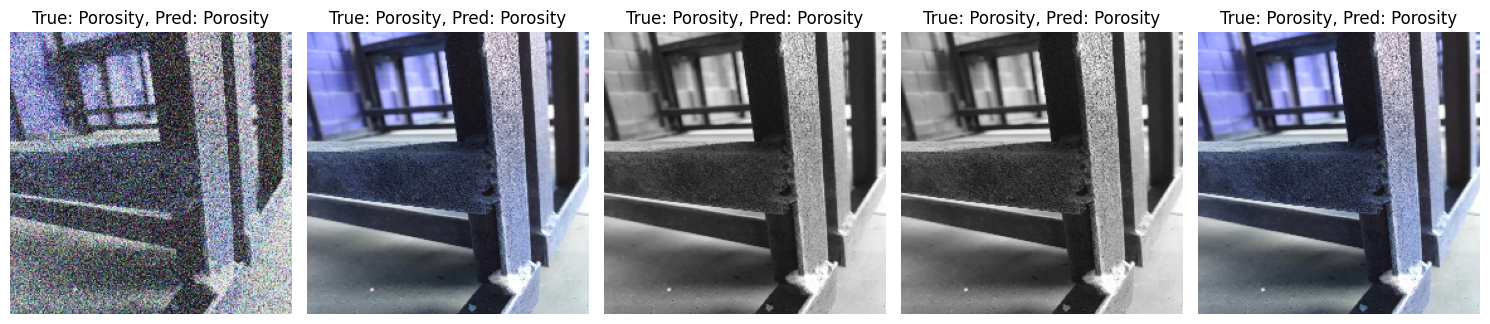

In [167]:
import matplotlib.pyplot as plt

# Function to plot the images with their predicted labels
def plot_predictions(images, true_labels, predicted_labels, categories, num_images=5):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.axis('off')
        plt.title(f"True: {categories[np.argmax(true_labels[i])]}, Pred: {categories[predicted_labels[i]]}")
    plt.tight_layout()
    plt.show()

# 1. Convert predictions to class indices (argmax to get the predicted class)
predicted_labels = np.argmax(predictions, axis=1)

# 2. Convert y_test (one-hot encoded) to class indices
y_test_labels = np.argmax(y_test, axis=1)

plot_predictions(X_test, y_test, predicted_labels, categories, num_images=5)


## YOLOv8s + EfficientNetB3

In [14]:
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical


In [15]:

base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Unfreeze last few layers for fine-tuning

# Unfreeze some layers of the base model for fine-tuning
for layer in base_model.layers[:100]:  # Unfreeze the last 100 layers
    layer.trainable = False


x = layers.GlobalAveragePooling2D()(base_model.output)  # Flatten the feature map
x = layers.Dense(1024, activation='relu')(x)  # Add a fully connected layer
x = layers.Dropout(0.5)(x)  # Add dropout for regularization
output_layer = layers.Dense(4, activation='softmax')(x)  # Final output layer for 10 classes
# Adjust for 4 classes

# Create final model
model_eff = Model(inputs=base_model.input, outputs=output_layer)

# Compile model
model_eff.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
# Train the model
histy = model_eff.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=20,
                        batch_size=32)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 106s 506ms/step - accuracy: 0.6594 - loss: 0.8621 - val_accuracy: 0.2500 - val_loss: 1.4074
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - accuracy: 0.8776 - loss: 0.3107 - val_accuracy: 0.2125 - val_loss: 1.4131
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 201ms/step - accuracy: 0.8812 - loss: 0.2973 - val_accuracy: 0.2125 - val_loss: 1.3931
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - accuracy: 0.8847 - loss: 0.2477 - val_accuracy: 0.3950 - val_loss: 1.1827
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - accuracy: 0.9130 - loss: 0.2193 - val_accuracy: 0.5475 - val_loss: 0.7663
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 198ms/step - accuracy: 0.9171 - loss: 0.2042 - val_accuracy: 0.9550 - val_loss: 0.2005
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - accuracy: 0.9184 - loss: 0.1960 - val_accuracy: 0.9625 - val_loss: 0.1142
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 199ms/step - accuracy: 0.9317 - loss: 0.1620 - val_acc

In [18]:
# Train the model
histy = model_eff.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=5,
                        batch_size=32)

Epoch 1/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 229ms/step - accuracy: 0.9811 - loss: 0.0475 - val_accuracy: 0.9650 - val_loss: 0.1336
Epoch 2/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 229ms/step - accuracy: 0.9785 - loss: 0.0434 - val_accuracy: 0.9675 - val_loss: 0.1264
Epoch 3/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 207ms/step - accuracy: 0.9865 - loss: 0.0472 - val_accuracy: 0.9650 - val_loss: 0.1609
Epoch 4/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 195ms/step - accuracy: 0.9841 - loss: 0.0456 - val_accuracy: 0.9650 - val_loss: 0.1370
Epoch 5/5
50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 192ms/step - accuracy: 0.9823 - loss: 0.0480 - val_accuracy: 0.9550 - val_loss: 0.1351


### Accuracy

In [19]:
# Now evaluate with the integer-encoded labels
test_loss, test_acc = model_eff.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.9714 - loss: 0.1295
Test accuracy: 0.9649999737739563


In [28]:
model_eff.save('/kaggle/working/efficientnet_defect_classifier1.h5')

In [30]:
import time
import numpy as np

num_images = X_test.shape[0]  # Total number of test images
total_time = 0

for i in range(num_images):
    img = np.expand_dims(X_test[i], axis=0)  # Add batch dimension

    start_time = time.time()
    _ = model_eff.predict(img, verbose=0)  # Run inference
    end_time = time.time()

    total_time += (end_time - start_time)

avg_time_per_image = total_time / num_images

print(f"Total Inference Time: {total_time:.6f} seconds")
print(f"Average Inference Time per Image: {avg_time_per_image:.6f} seconds")


Total Inference Time: 24.362191 seconds
Average Inference Time per Image: 0.060905 seconds


### Prediction

In [21]:

predictions = model_eff.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 748ms/step


In [23]:

import matplotlib.pyplot as plt

Confusion Matrix:
[[99  1  0  0]
 [ 0 92  0  8]
 [ 0  4 93  3]
 [ 0  1  0 99]]


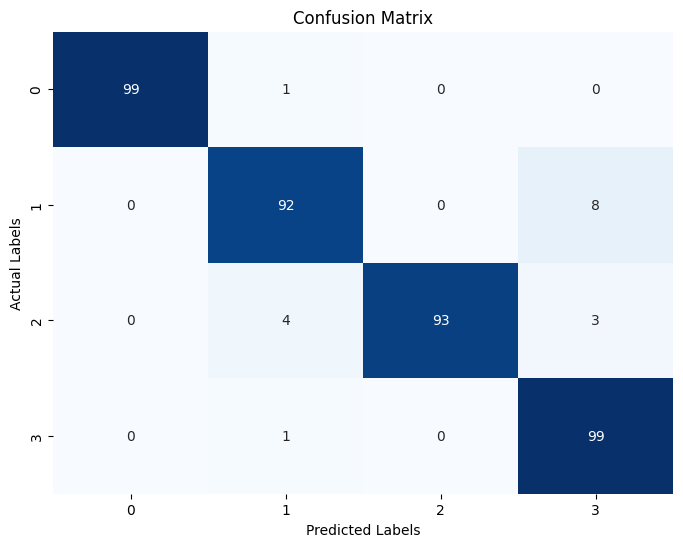

In [186]:
import seaborn as sns
predicted_labels = np.argmax(predictions, axis=1)

# 2. Convert y_test (one-hot encoded) to class indices
y_test_labels = np.argmax(y_test, axis=1)

# 3. Calculate the confusion matrix
confusion_matrix2 = tf.math.confusion_matrix(y_test_labels, predicted_labels)

# 4. Convert to numpy for easier handling
confusion_matrix2= confusion_matrix2.numpy()

# Print the confusion matrix as a raw tensor
print("Confusion Matrix:")
print(confusion_matrix2)
# Optionally, visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix2, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.ylabel("Actual Labels")
plt.xlabel("Predicted Labels")
plt.show()

In [187]:
# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)

# Map predicted labels to category names
predicted_categories = [categories[label] for label in predicted_labels]

# Print the predicted categories
print("Predicted categories:", predicted_categories)

Predicted categories: ['Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Overweld', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Porosity', 'Poro

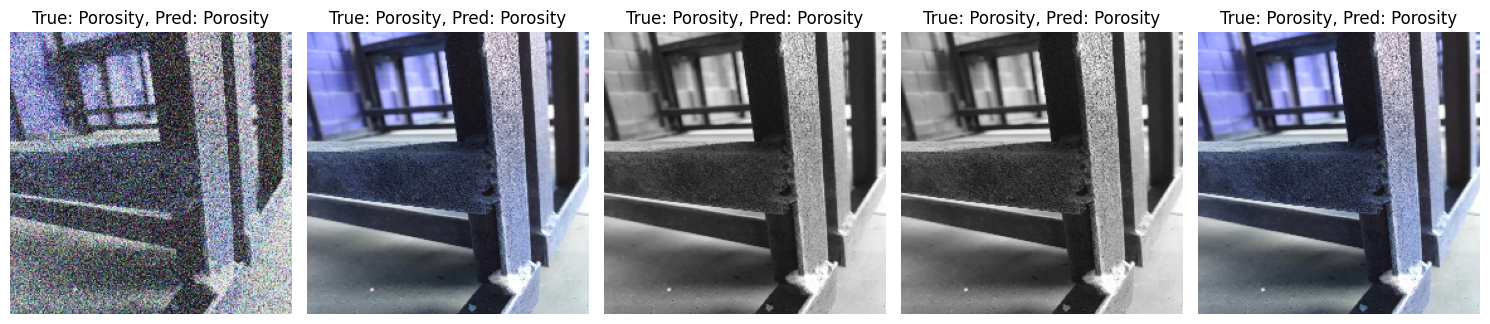

In [188]:
plot_predictions(X_test, y_test, predicted_labels, categories, num_images=5)

In [27]:
y_pred = np.argmax(model_eff.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)  # Assuming y_test is one-hot encoded

from sklearn.metrics import classification_report
report = classification_report(y_true, y_pred, target_names=categories)  # Replace 'class_names' with your class labels
print("Classification Report:")
print(report)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step
Classification Report:
              precision    recall  f1-score   support

    Porosity       1.00      0.98      0.99       100
    Overweld       0.88      1.00      0.93       100
 Underfilled       1.00      0.88      0.94       100
    Undercut       1.00      1.00      1.00       100

    accuracy                           0.96       400
   macro avg       0.97      0.96      0.97       400
weighted avg       0.97      0.96      0.97       400

